In [2]:
%run hapclust_utils.ipynb

In [3]:
callset = h5py.File('../data/ag1000g.phase1.AR3.1.haplotypes.specific_regions.2L_2358158_2431617.h5',
                    mode='r')
region_vgsc = SeqFeature('2L', 2358158, 2431617)
genotypes = allel.GenotypeArray(callset['2L/calldata/genotype'])
haplotypes = genotypes.to_haplotypes()
pos = allel.SortedIndex(callset['2L/variants/POS'])
loc = pos.locate_range(region_vgsc.start, region_vgsc.end)
h_vgsc = haplotypes[loc]
pos_995S = 2422651
pos_995F = 2422652
loc_995S = haplotypes[pos.locate_key(pos_995S)] == 1
loc_995F = haplotypes[pos.locate_key(pos_995F)] == 1
h_vgsc_995F = h_vgsc.compress(loc_995F, axis=1)
h_vgsc_995S = h_vgsc.compress(loc_995S, axis=1)
sample_ids = callset['2L']['samples'][:]
hap_ids = np.array(list(itertools.chain(*[[s + b'a', s + b'b'] for s in sample_ids])))
hap_ids_995F = hap_ids[loc_995F]
hap_ids_995S = hap_ids[loc_995S]
tbl_haplotypes = etl.fromtsv('../data/ag1000g.phase1.AR3.1.haplotypes.meta.txt')
hap_pops = np.array(tbl_haplotypes.values('population'))
hap_pops_995S = hap_pops[loc_995S]
hap_pops_995F = hap_pops[loc_995F]
# need to use named colors for graphviz
pop_colors = {
    'AOM': 'brown',
    'BFM': 'firebrick1',
    'GWA': 'goldenrod1',
    'GNS': 'cadetblue1',
    'BFS': 'deepskyblue',
    'CMS': 'dodgerblue3',
    'UGS': 'palegreen',
    'GAS': 'olivedrab',
    'KES': 'grey47',
    'colony': 'black'
}
hap_colors_995S = np.array([pop_colors[p] for p in hap_pops_995S])
hap_colors_995F = np.array([pop_colors[p] for p in hap_pops_995F])

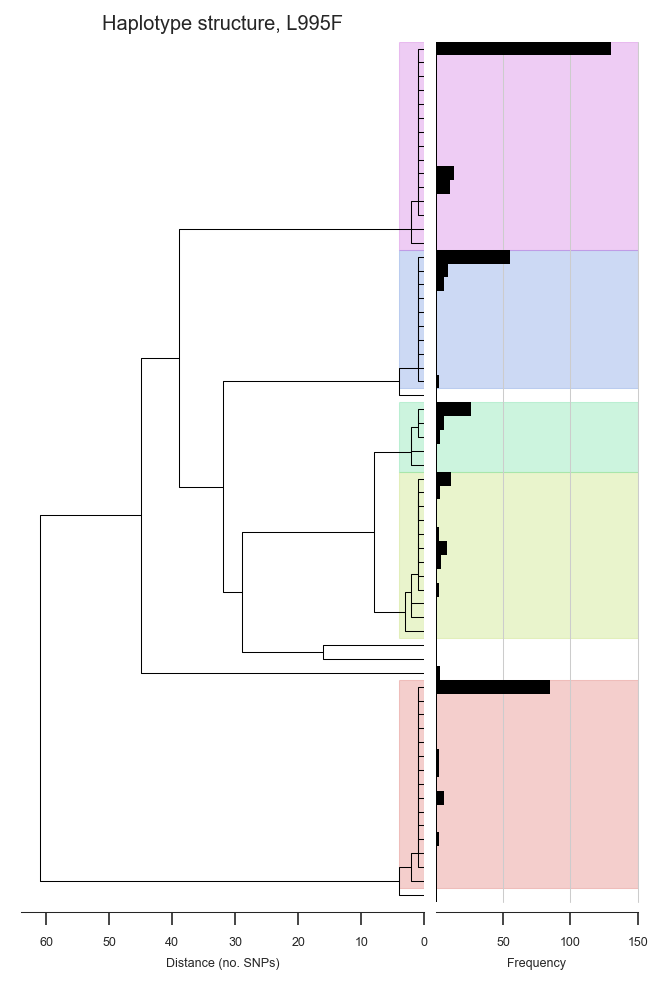

In [8]:
fig, ax_dend, ax_freq, cluster_spans, leaf_obs = fig_haplotypes_clustered(h_vgsc_995S, orientation='left', cut_height=4, dpi=150, highlight_clusters=5, label_clusters=False)
ax_dend.set_title('Haplotype structure, L995F')
ax_dend.set_xlabel('Distance (no. SNPs)');

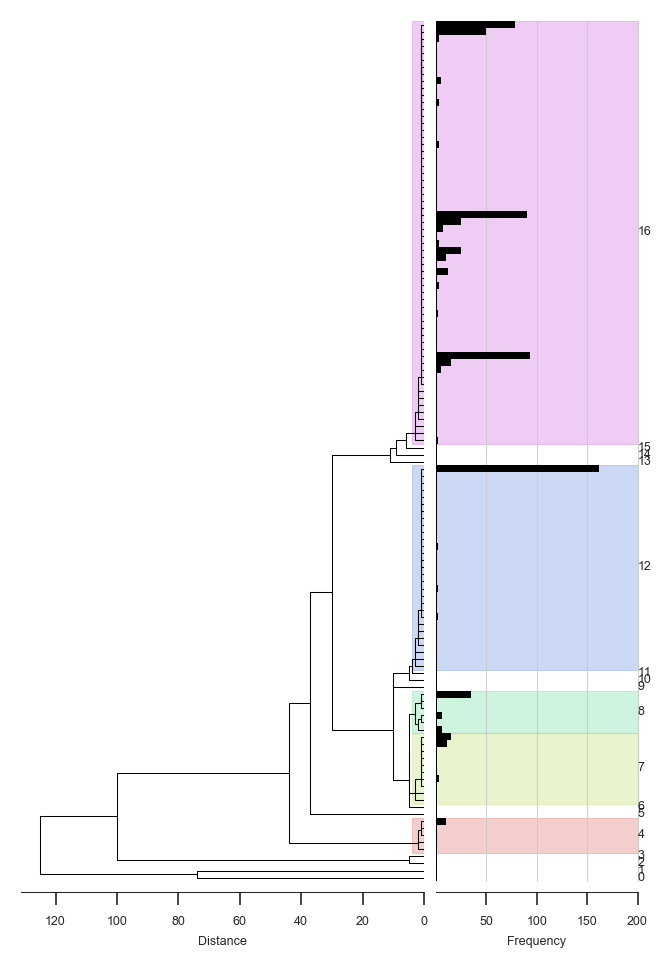

In [5]:
fig, ax_dend, ax_freq, cluster_spans, leaf_obs = fig_haplotypes_clustered(h_vgsc_995F, orientation='left', cut_height=4, dpi=150, highlight_clusters=5)

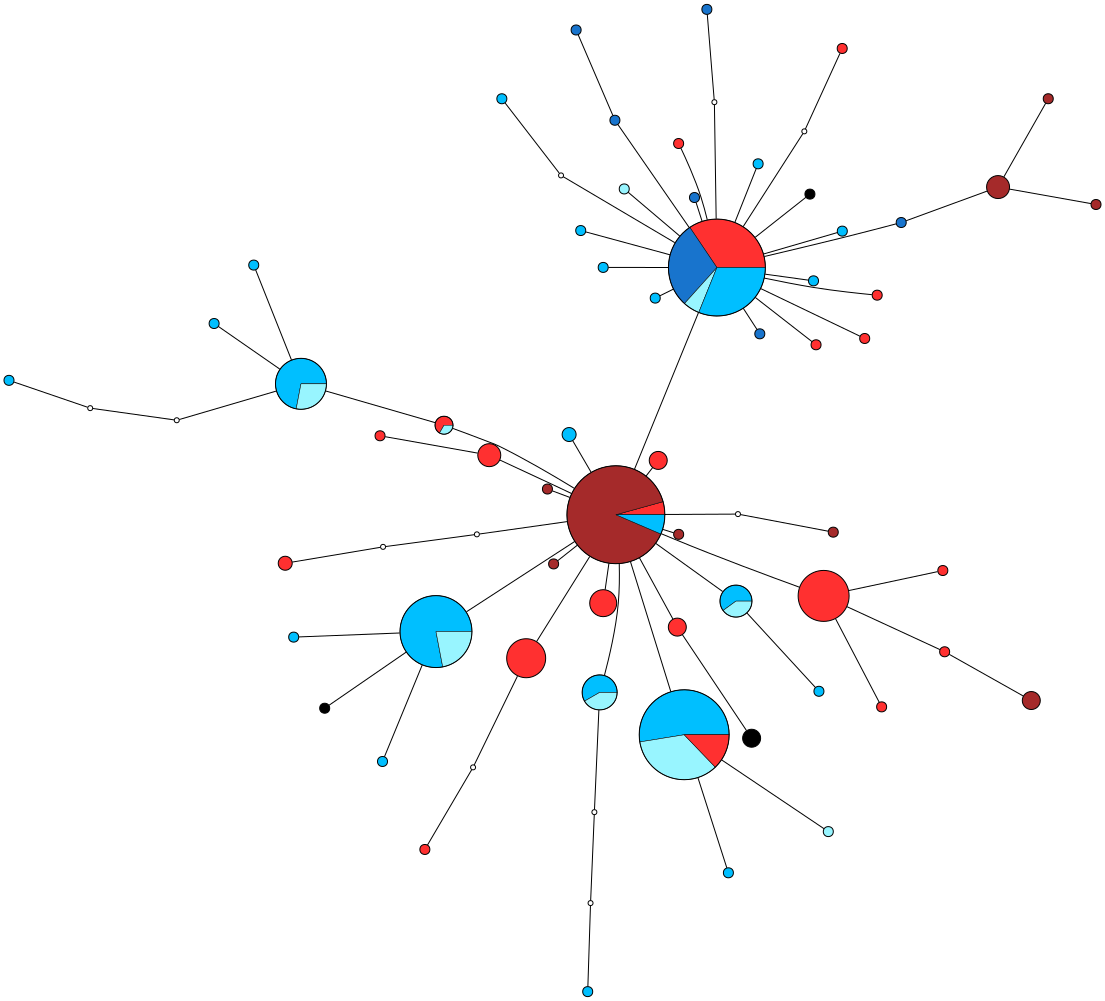

In [33]:
cluster_idx = 16
dend_start, dend_stop, cluster_hap_indices = cluster_spans[cluster_idx]
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph

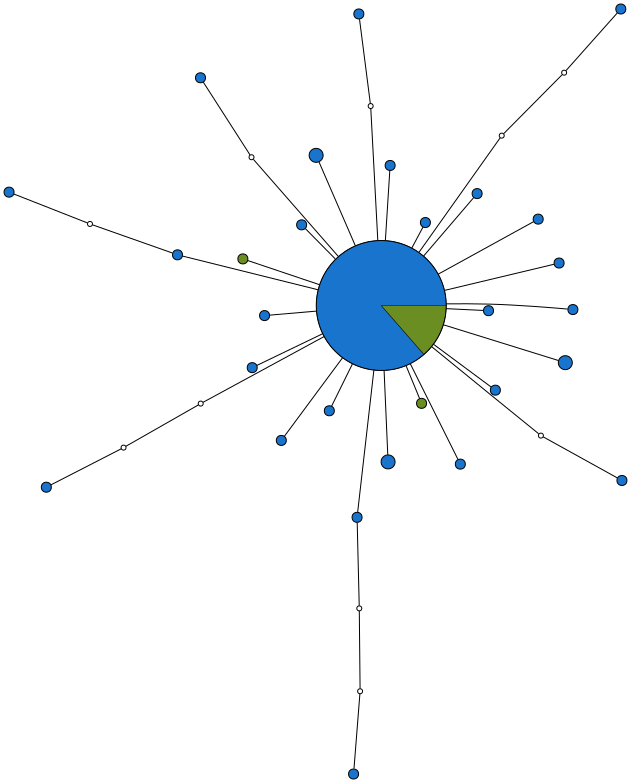

In [34]:
cluster_idx = 12
dend_start, dend_stop, cluster_hap_indices = cluster_spans[cluster_idx]
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph

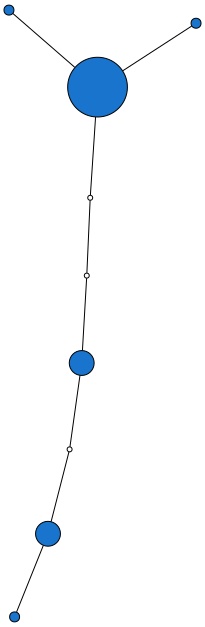

In [35]:
cluster_idx = 8
dend_start, dend_stop, cluster_hap_indices = cluster_spans[cluster_idx]
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph

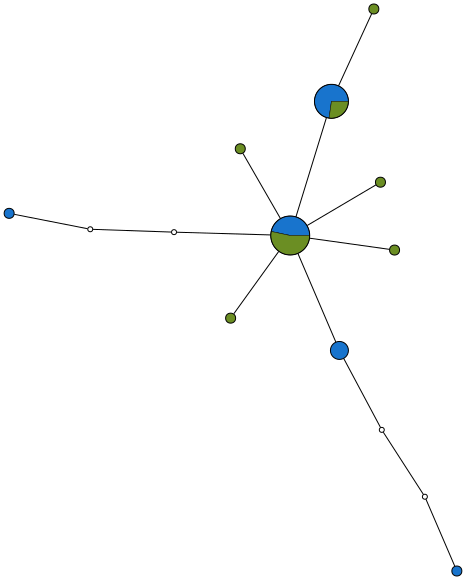

In [36]:
cluster_idx = 7
dend_start, dend_stop, cluster_hap_indices = cluster_spans[cluster_idx]
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph

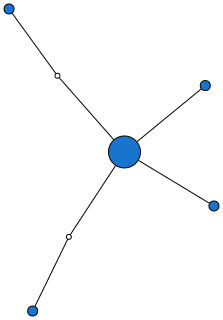

In [37]:
cluster_idx = 4
dend_start, dend_stop, cluster_hap_indices = cluster_spans[cluster_idx]
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph

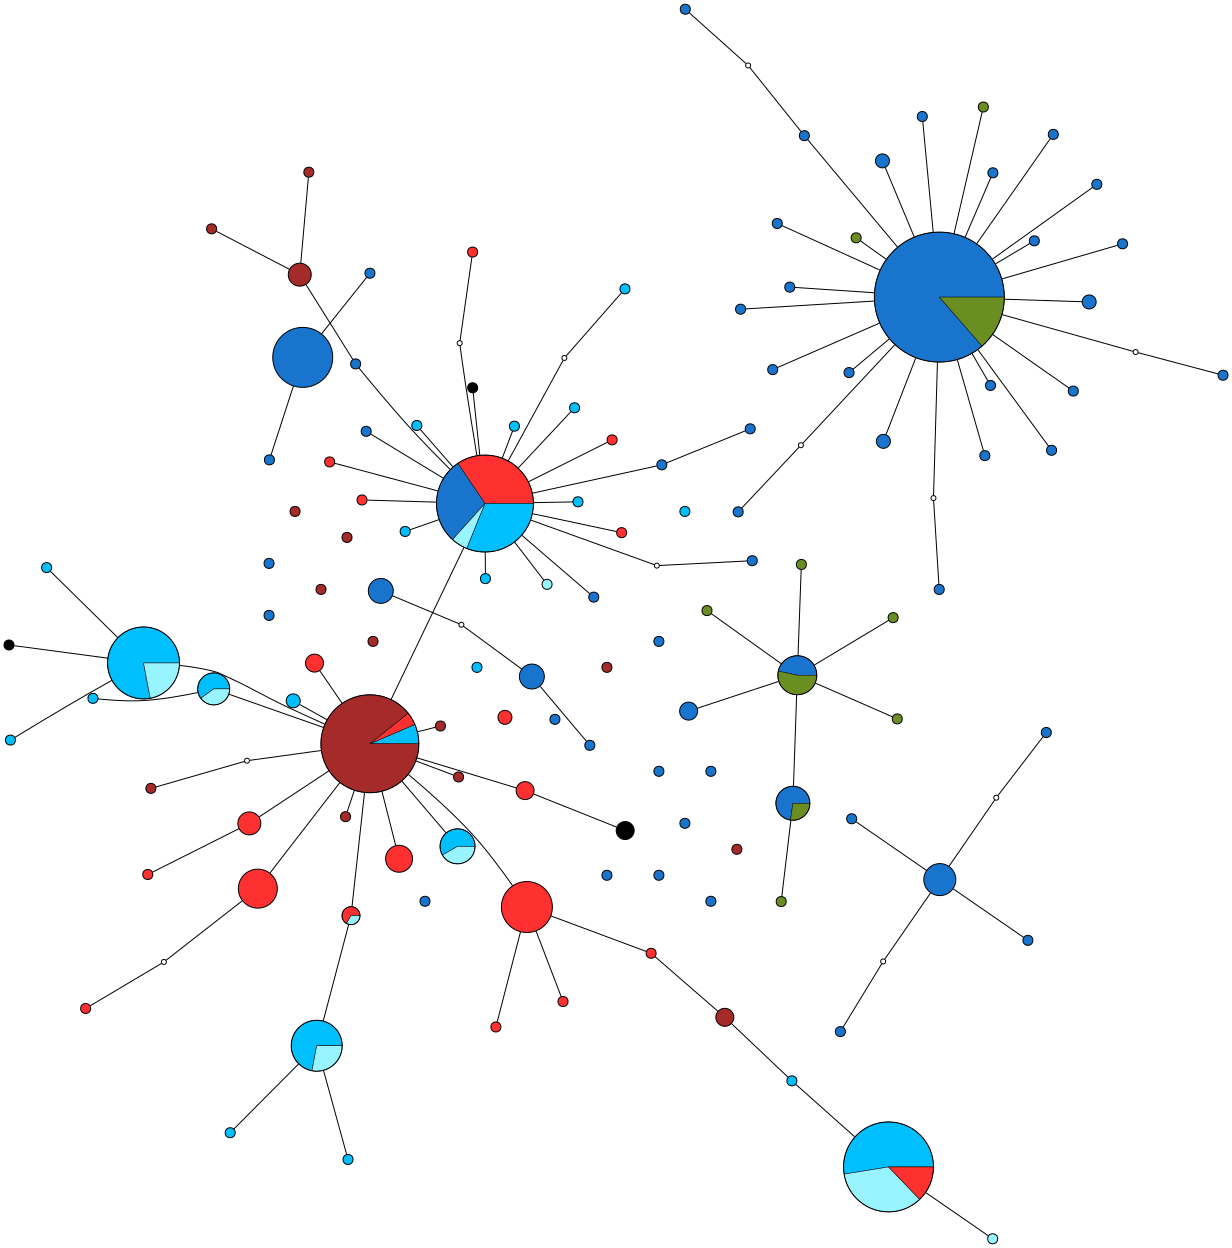

In [39]:
graph = graph_haplotype_network(h_vgsc_995F, hap_colors=hap_colors_995F, edge_length=1, node_size_factor=.02, max_dist=2, mode='major', overlap=False, splines=True)
graph

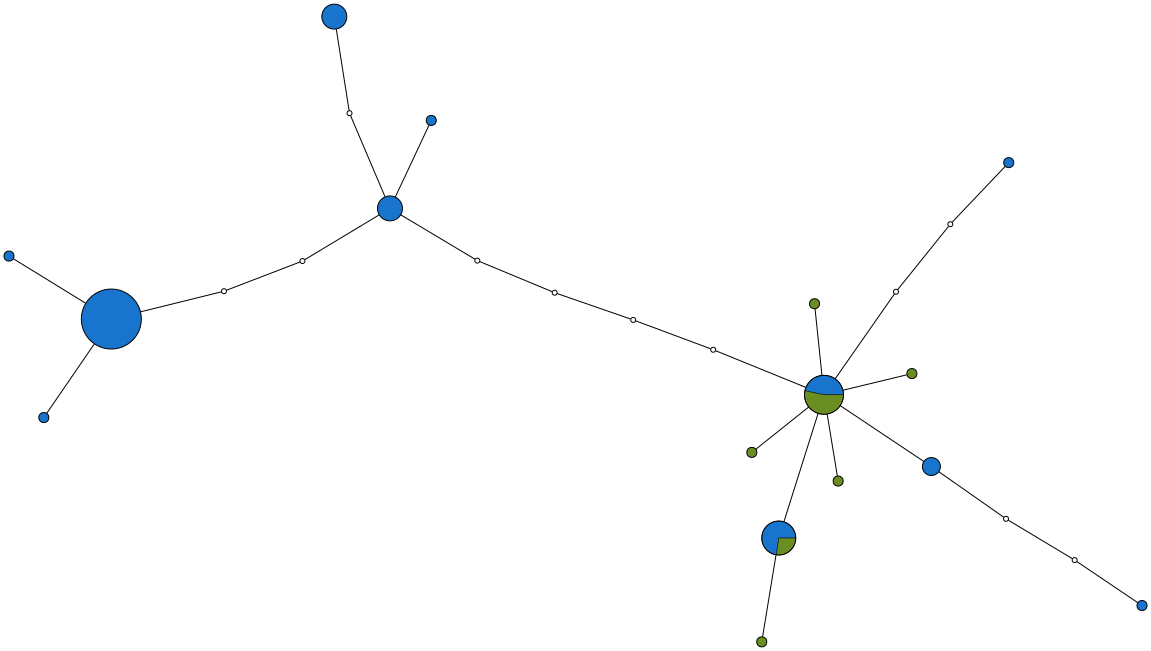

In [47]:
cluster_hap_indices = None
for cluster_idx in 7, 8:
    _, _, chi = cluster_spans[cluster_idx]
    if cluster_hap_indices is None:
        cluster_hap_indices = chi
    else:
        cluster_hap_indices = np.concatenate([cluster_hap_indices, chi])
cluster_haps = h_vgsc_995F.take(cluster_hap_indices, axis=1)
cluster_hap_pops = hap_pops_995F[cluster_hap_indices]
cluster_hap_colors = np.array([pop_colors[p] for p in cluster_hap_pops])
graph = graph_haplotype_network(cluster_haps, hap_colors=cluster_hap_colors, max_dist=None, edge_length=1, node_size_factor=.02, mode='major', overlap=False, splines=True)
graph